# 準備

以下のコードを実行して Google Drive をマウントすれば、Colaboratory から Google Drive 上のファイルを読み込めるようになる。

In [6]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# データの読み込みと確認

pandas ライブラリを読み込み、"pd" という名前をつける。これ以降、コード内に現れる "pd" はpandas ライブラリを意味する。

In [28]:
import pandas as pd

Google Drive 内にある "dataset" フォルダ内の "boston.csv" というデータファイルを読み込む。ファイルの場所をしてする際、頭に "drive/MyDrive/..." とつくことに注意しよう。データはまとめて "df" という変数に代入される。

In [30]:
df = pd.read_csv('drive/MyDrive/dataset/boston.csv')

読み込んだデータを表示して確認しよう。ここでは、最初の10行のみを表示する。

In [39]:
df.head(10)

,RM,DIS,RAD,LSTAT,MEDV
0,6.575,4.0900,1,4.98,24.0
1,6.421,4.9671,2,9.14,21.6
2,7.185,4.9671,2,4.03,34.7
3,6.998,6.0622,3,2.94,33.4
4,7.147,6.0622,3,5.33,36.2
5,6.430,6.0622,3,5.21,28.7
6,6.012,5.5605,5,12.43,22.9
7,6.172,5.9505,5,19.15,27.1
8,5.631,6.0821,5,29.93,16.5
9,6.004,6.5921,5,17.10,18.9


特定の列のデータのみを取り出すには、以下のようにする。

In [43]:
df['MEDV']

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

# 散布図と相関係数

matplotlib ライブラリと seaborn ライブラリを読み込もう。ただし、"%matplotlib inline" とは、matplotlib で作成した図を直ちに表示するという意味である。

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

matplotlib ライブラリを使えば、散布図が描画できる。ここでは、"RM" 列のデータを横軸、"MEDV" 列のデータを縦軸として散布図を描画している。ここで、"alpha=0.5" と設定したのは、点の透明度である。

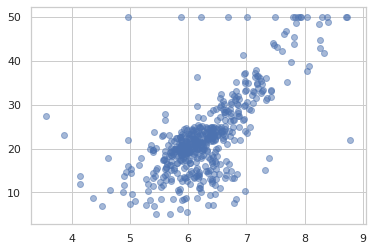

In [42]:
plt.scatter(df['RM'], df['MEDV'], alpha=0.5)

seaborn ライブラリを使えば、全ての変数のペアについてまとめて散布図を描画できる。

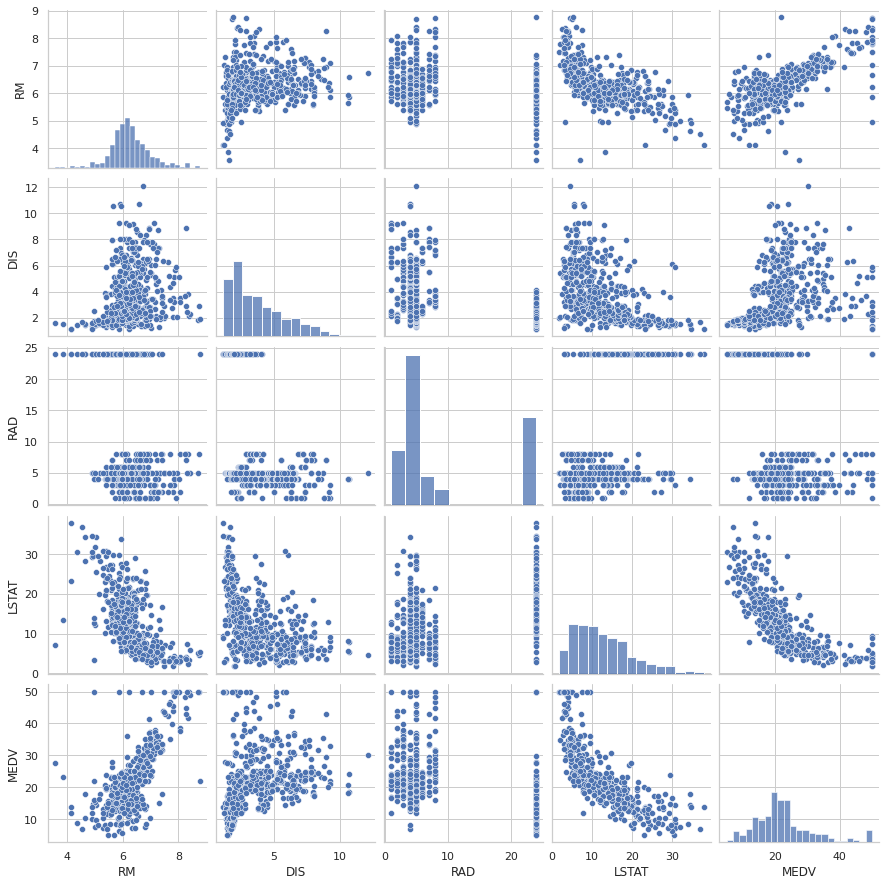

In [41]:
sns.pairplot(df)

相関係数を計算しよう。

In [44]:
df.corr()

,RM,DIS,RAD,LSTAT,MEDV
RM,1.000000,0.205246,-0.209847,-0.613808,0.695360
DIS,0.205246,1.000000,-0.494588,-0.496996,0.249929
RAD,-0.209847,-0.494588,1.000000,0.488676,-0.381626
LSTAT,-0.613808,-0.496996,0.488676,1.000000,-0.737663
MEDV,0.695360,0.249929,-0.381626,-0.737663,1.000000


# 回帰直線

numpy ライブラリを読み込み、polyfit 関数を使って回帰直線の傾き$a$と切片$b$を求める。polyfit 関数の引数は、第1引数が説明変数のデータ、第2引数が目的変数のデータで、第３引数は多項式の次数 (この場合は直線なので1次) となっている。

In [47]:
import numpy as np
a, b = np.polyfit(df['RM'], df['MEDV'], 1)

計算された傾きと切片を使って、回帰直線の式を計算しよう。

In [48]:
x = df['RM']
y = a * x + b

散布図に回帰直線を重ねて描画しよう。2行目では、matplotlib ライブラリの plot 関数を使って線を描画している。

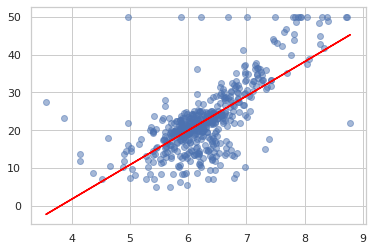

In [64]:
plt.scatter(df['RM'], df['MEDV'], alpha=0.5) # 散布図
plt.plot(df['RM'], y, color='red') # 回帰直線

# 重回帰分析

まず、statsmodels ライブラリを読み込もう。

In [51]:
import statsmodels.api as sm

次に、データの前処理を行う。1行目では、"MEDV" 列を除いたデータを X としている。2行目では、X に対して標準化の処理を行っている。3行目では、Xに定数の列を追加している。

In [52]:
X = df.drop(columns='MEDV')
X = (X - X.mean()) / X.std()
X = sm.add_constant(X)

X を表示して確認しよう。

In [53]:
X.head(10)

,const,RM,DIS,RAD,LSTAT
0,1.0,0.413263,0.140075,-0.981871,-1.074499
1,1.0,0.194082,0.556609,-0.867024,-0.491953
2,1.0,1.281446,0.556609,-0.867024,-1.207532
3,1.0,1.015298,1.076671,-0.752178,-1.360171
4,1.0,1.227362,1.076671,-0.752178,-1.025487
5,1.0,0.206892,1.076671,-0.752178,-1.042291
6,1.0,-0.388027,0.838414,-0.522484,-0.031237
7,1.0,-0.160307,1.023625,-0.522484,0.909800
8,1.0,-0.930285,1.086122,-0.522484,2.419379
9,1.0,-0.399413,1.328320,-0.522484,0.622728


また、データの "MEDV" 列のみを取り出して Y とする。

In [54]:
Y = df['MEDV']

statsmodels ライブラリを使って重回帰分析を行う。１行目で重回帰分析の計算を行い、2行目で結果を表示している。"R-squared" が予測の精度を表す指標で、完璧に予測できた場合には1となり、全く予測できていない場合には0になる。"coef" が推定された回帰係数である。"P>|t|"は回帰係数が0であるという帰無仮説の下で検定を行った場合のパーセント値で、この値が例えば0.05未満であれば有意水準0.05で回帰係数は0ではない(有意である)といえる。

この結果では、全ての説明変数が有意水準 0.05 で有意となり、目的変数に対して何らかの影響を与えることが示唆される。また、説明変数の中では、"RM" と "LSTAT" の係数の絶対値が大きく、"RM" の回帰係数は正の値をとることから目的変数に正の影響を与えることが示唆され、"LSTAT" の回帰係数は負の値をとることから目的変数に負の影響を与えることが示唆される。

In [61]:
result = sm.OLS(Y, X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.657
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                     239.5
Date:                Wed, 13 Jan 2021   Prob (F-statistic):          8.54e-115
Time:                        00:57:18   Log-Likelihood:                -1569.8
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     501   BIC:                             3171.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.5328      0.241     93.675      0.000      22.060      23.005
RM             3.5276      0.309     11.398      0.000       2.920       4.136
DIS           -1.3296      0.296     -4.492      0.000      -1.911      -0.748
RAD           -1.1128      0.294     -3.788      0.000      -1.690      -0.536
LSTAT         -4.7361      0.366    -12.950      0.000      -5.455      -4.018
==============================================================================
Omnibus:                      155.605   Durbin-Watson:                   0.884
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              551.353
Skew:                           1.390   Prob(JB):                    1.88e-120
Kurtosis:                       7.292   Cond. No.                         2.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

重回帰による予測値と実際の値を散布図で比較してみよう。もし点が右肩上がりの直線上に並んでいたら、予測がほぼ完璧に当たったということを意味する。一方、もし点が無秩序に散らばっていたら、全く予測が当たっていないということを意味する。

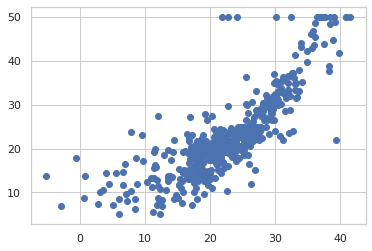

In [63]:
plt.scatter(result.predict(X), Y)